<p style="background-color:#D2D4C8;font-family:ui-rounded;color:#FF0000;font-size:200%;text-align:center;border-radius:10px 10px;">Import Needed Libraries</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings
warnings.filterwarnings('ignore')
from hyperopt.pyll.base import scope
import math

<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:150%; text-align:center; padding: 10px; border-radius:10px;">Load & Summary  Data </p>


In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/train.csv')

In [3]:
df_test=pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/test.csv')

In [4]:
# Print the first 5 rows of the dataframe.
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
df_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [6]:
# Print the summary of the dataframe
print(df.describe( include='all'))


                  Id         carat    cut  color clarity         depth  \
count   43152.000000  43152.000000  43152  43152   43152  43152.000000   
unique           NaN           NaN      5      7       8           NaN   
top              NaN           NaN  Ideal      G     SI1           NaN   
freq             NaN           NaN  17203   9060   10428           NaN   
mean    21576.500000      0.797855    NaN    NaN     NaN     61.747177   
std     12457.053745      0.473594    NaN    NaN     NaN      1.435454   
min         1.000000      0.200000    NaN    NaN     NaN     43.000000   
25%     10788.750000      0.400000    NaN    NaN     NaN     61.000000   
50%     21576.500000      0.700000    NaN    NaN     NaN     61.800000   
75%     32364.250000      1.040000    NaN    NaN     NaN     62.500000   
max     43152.000000      5.010000    NaN    NaN     NaN     79.000000   

               table         price             x             y             z  
count   43152.000000  43152.0000

In [7]:
# find unique values in the dataframe
print(df['cut'].unique())
print(df['cut'].value_counts())

['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64


In [8]:
print(df['color'].unique())
print(df['color'].value_counts())

['I' 'G' 'F' 'H' 'D' 'E' 'J']
color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64


In [9]:
print(df['clarity'].unique())
print(df['clarity'].value_counts())

['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']
clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64


<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:150%; text-align:center; padding: 10px; border-radius:10px;">Basic EDA</p>


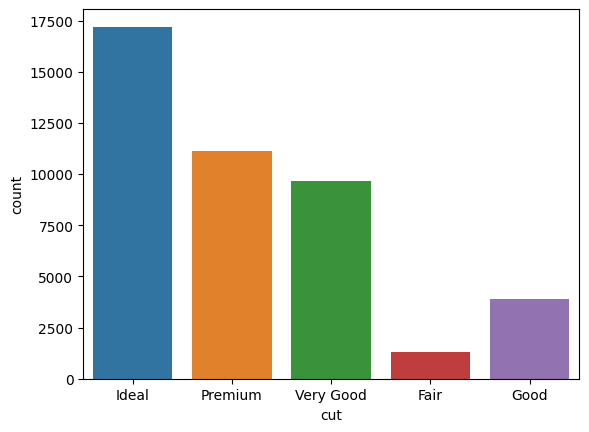

In [10]:
sns.countplot(x='cut', data=df)
plt.show()

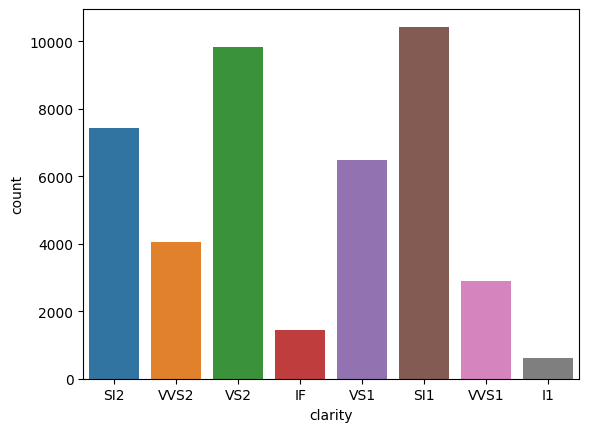

In [11]:
sns.countplot(x='clarity', data=df)
plt.show()

#### color diamond colour, from J (worst) to D (best)

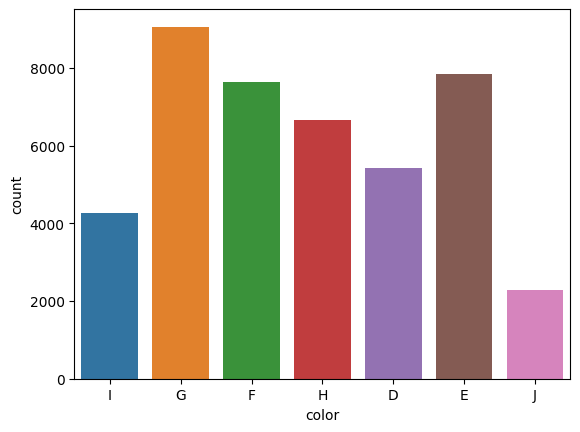

In [12]:
sns.countplot(x='color', data=df)
plt.show()

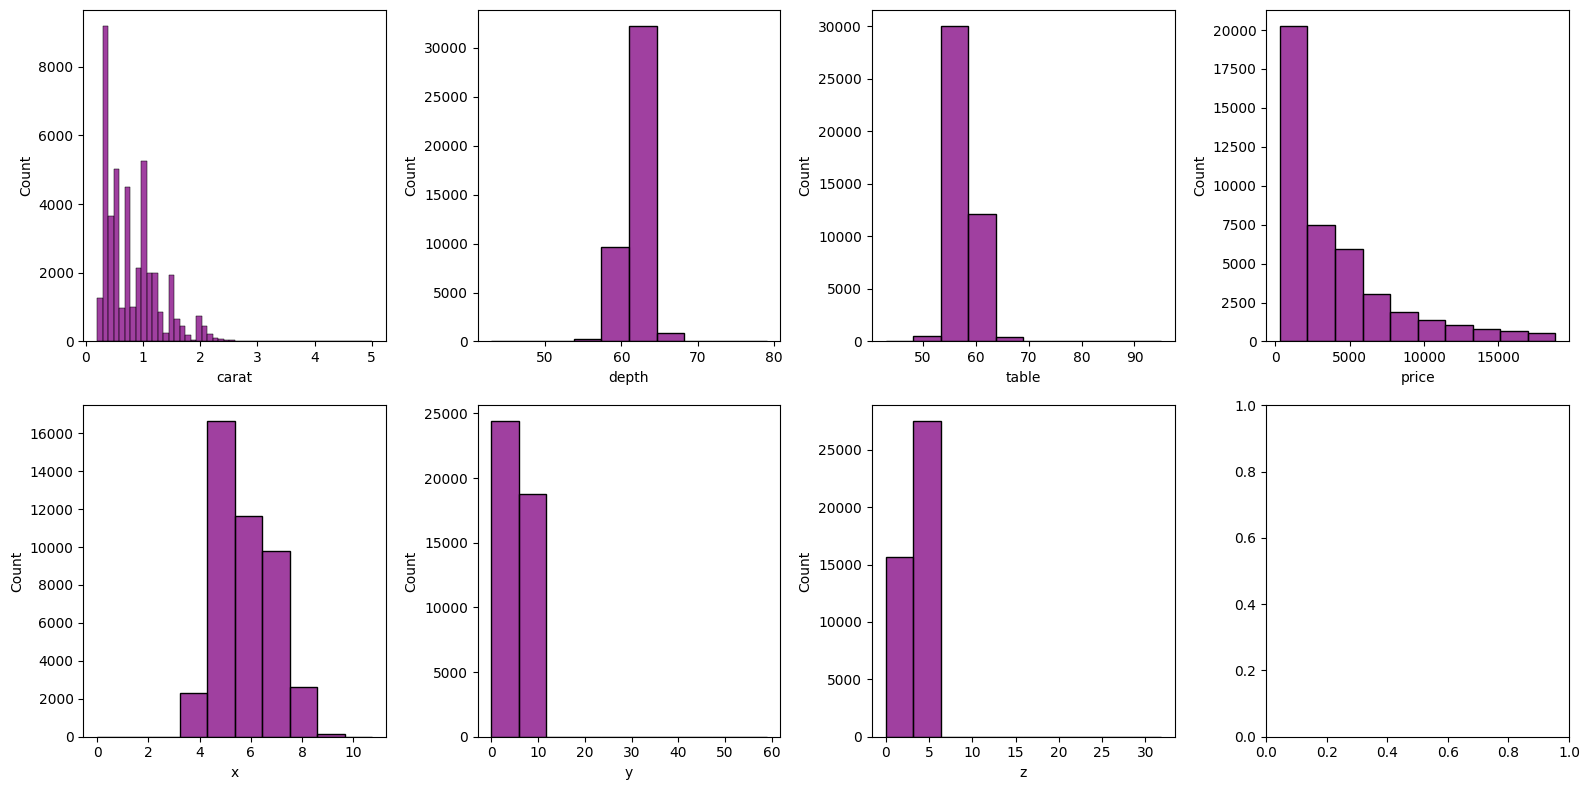

In [13]:
num_variable = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
numerical_col = num_variable.columns
# Initialize figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Define the variables for each subplot
variables = numerical_col
bins = [50, 10, 10, 10, 10, 10, 10]

# Loop through each subplot and draw histograms for each variable
for i in range(2):
    for j in range(4):
        if i * 4 + j < len(variables):
            sns.histplot(ax=axes[i][j], data=num_variable[variables[i * 4 + j]], bins=bins[i * 4 + j], color='purple')
            axes[i][j].set_xlabel(variables[i * 4 + j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


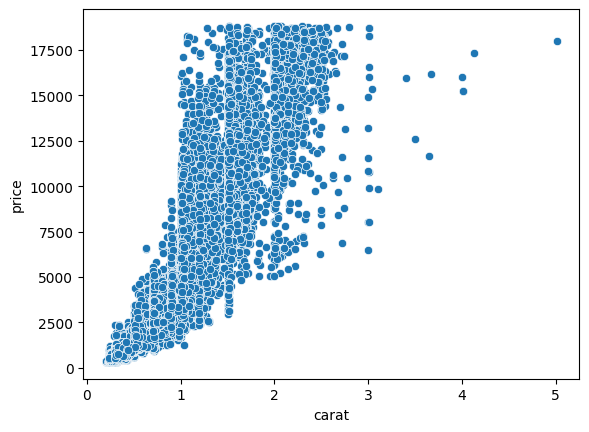

In [14]:
# add scatter plot
sns.scatterplot(x='carat', y='price', data=df)
plt.show()

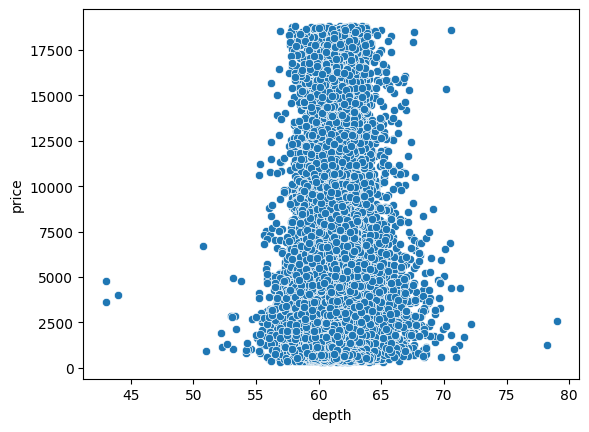

In [15]:
sns.scatterplot(x='depth', y='price', data=df)
plt.show()

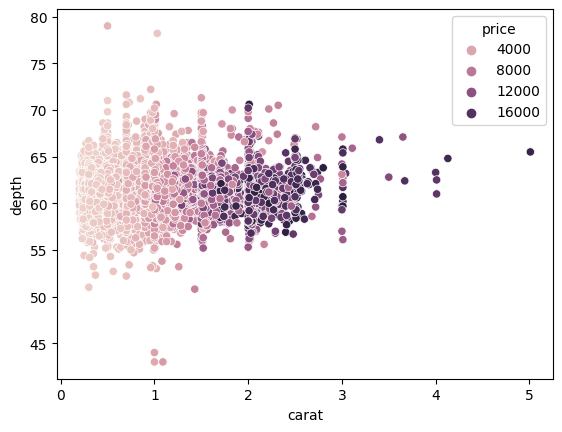

In [16]:
# add scatter plot
sns.scatterplot(x='carat', y='depth', data=df,hue='price')
plt.show()

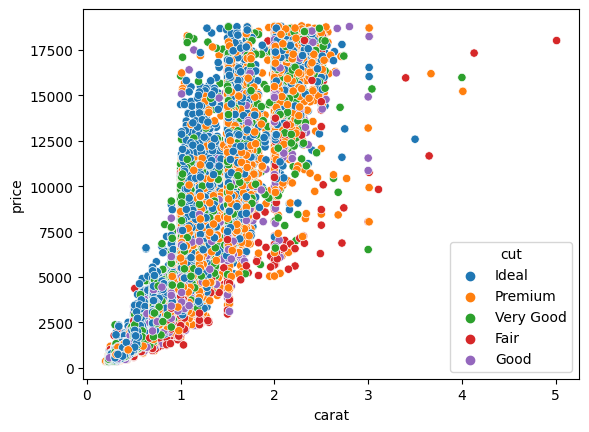

In [17]:
# add scatter plot
sns.scatterplot(x='carat', y='price', data=df,hue='cut')
plt.show()

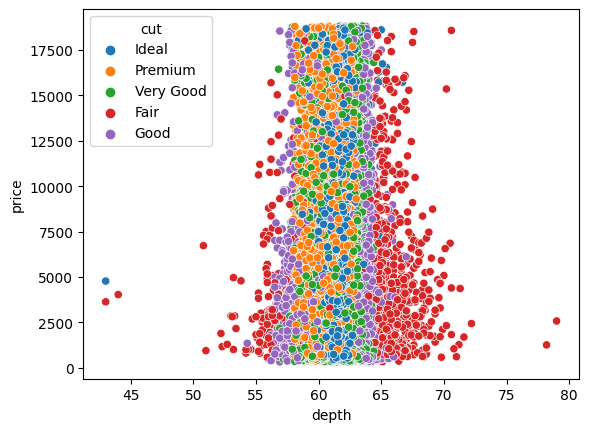

In [18]:
# add scatter plot
sns.scatterplot(x='depth', y='price', data=df,hue='cut')
plt.show()

#### x length in mm (0--10.74)

#### y width in mm (0--58.9)

#### z depth in mm (0--31.8)

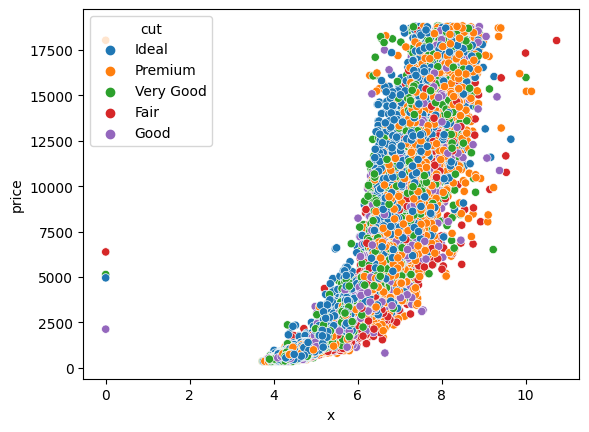

In [19]:
# add scatter plot
sns.scatterplot(x='x', y='price', data=df,hue='cut')
plt.show()

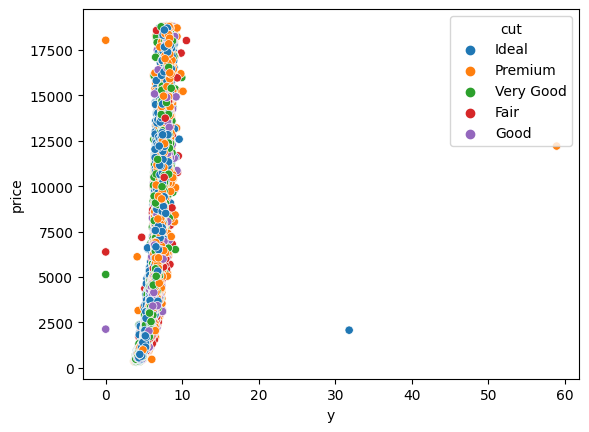

In [20]:
# add scatter plot
sns.scatterplot(x='y', y='price', data=df,hue='cut')
plt.show()

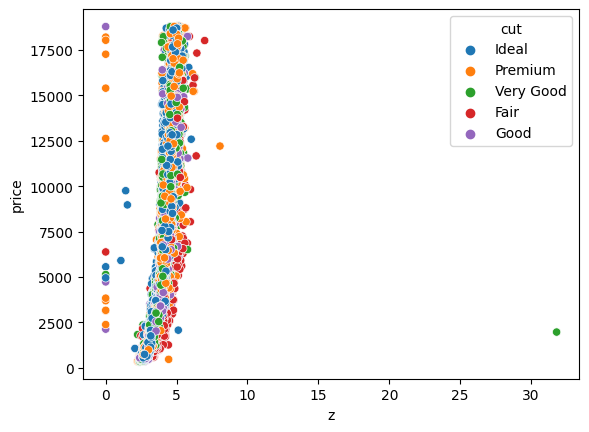

In [21]:
# add scatter plot
sns.scatterplot(x='z', y='price', data=df,hue='cut')
plt.show()

<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:150%; text-align:center; padding: 10px; border-radius:10px;">Prepare Data for More EDA</p>


In [22]:
#Label Encoding
label =LabelEncoder()
df['cut'] = label.fit_transform(df['cut'])
df['color'] = label.fit_transform(df['color'])
df['clarity'] = label.fit_transform(df['clarity'])



In [23]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:150%; text-align:center; padding: 10px; border-radius:10px;">Find Correlation</p>


In [24]:
# Create a mask using numpy's triu function
correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

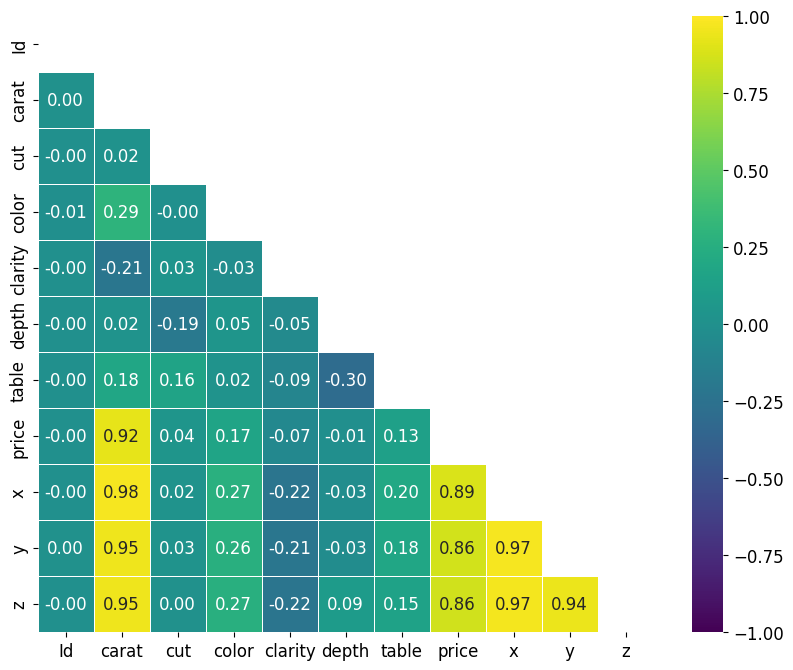

In [25]:
# Create a masked heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()


In [26]:
df = df.drop(['Id'], axis=1)

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:150%; text-align:center; padding: 10px; border-radius:10px;">Explore Outliers Using Boxplot</p>


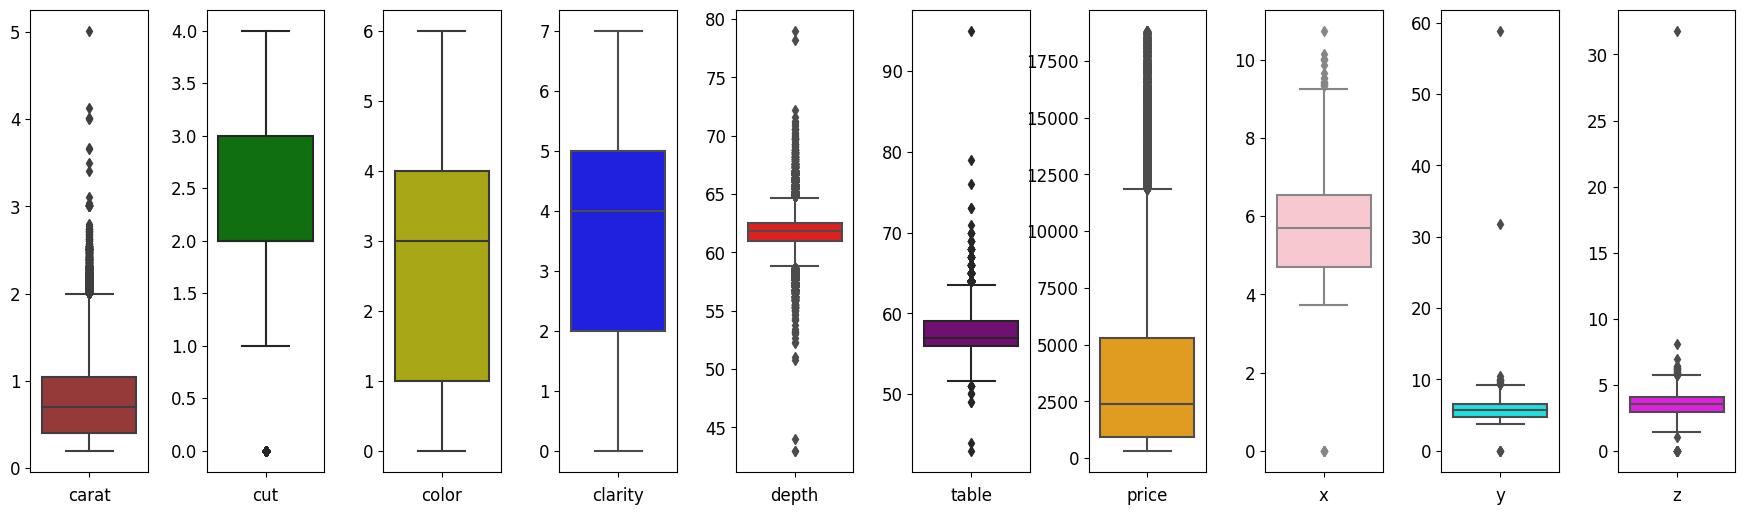

In [28]:
# Initialize figure with 10 subplots in a row
fig, ax = plt.subplots(1, 10, figsize=(22, 6))

# Add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# Define the variables for each subplot
variables = df.columns  # Assuming categorical_col contains the names of your categorical columns
colors = ['brown', 'g', 'y', 'b', 'r', 'purple', 'orange', 'pink', 'cyan', 'magenta']
x_labels = df.columns

# Draw boxplots for each variable in its corresponding subplot
for i, variable in enumerate(variables):
    sns.boxplot(data=df[variable], ax=ax[i], color=colors[i])
    ax[i].set_xlabel(x_labels[i])

    # Remove x-tick labels
    ax[i].set_xticklabels([])

plt.show()


In [29]:
# Count the total outliers for each variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Marking the outliers in the DataFrame
outliers_mask = ((df[df.columns] < min_value) | (df[df.columns] > max_value))

# Removing outliers from the DataFrame
df_no_outliers = df[~outliers_mask.any(axis=1)]

# Counting the total number of outliers
total_outliers = outliers_mask.sum()

print("Total outliers for each variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())




Total outliers for each variable:
carat      1504
cut        1297
color         0
clarity       0
depth      2056
table       472
price      2844
x            21
y            19
z            39
dtype: int64
Total outliers: 8252


#### DataFrame without outliers:

In [30]:
# Show the DataFrame without outliers
print("\nDataFrame without outliers:")
df_no_outliers


DataFrame without outliers:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50
5,0.90,4,3,1,63.1,58.0,5670,6.18,6.09,3.87
...,...,...,...,...,...,...,...,...,...,...
43147,0.52,2,1,5,61.5,56.0,1760,5.16,5.18,3.18
43148,0.72,4,0,5,62.1,59.0,3016,5.70,5.73,3.55
43149,0.44,3,5,6,61.5,58.0,990,4.95,4.87,3.02
43150,0.31,3,1,4,60.2,58.0,734,4.38,4.43,2.65


#### Data After Removing Outliers

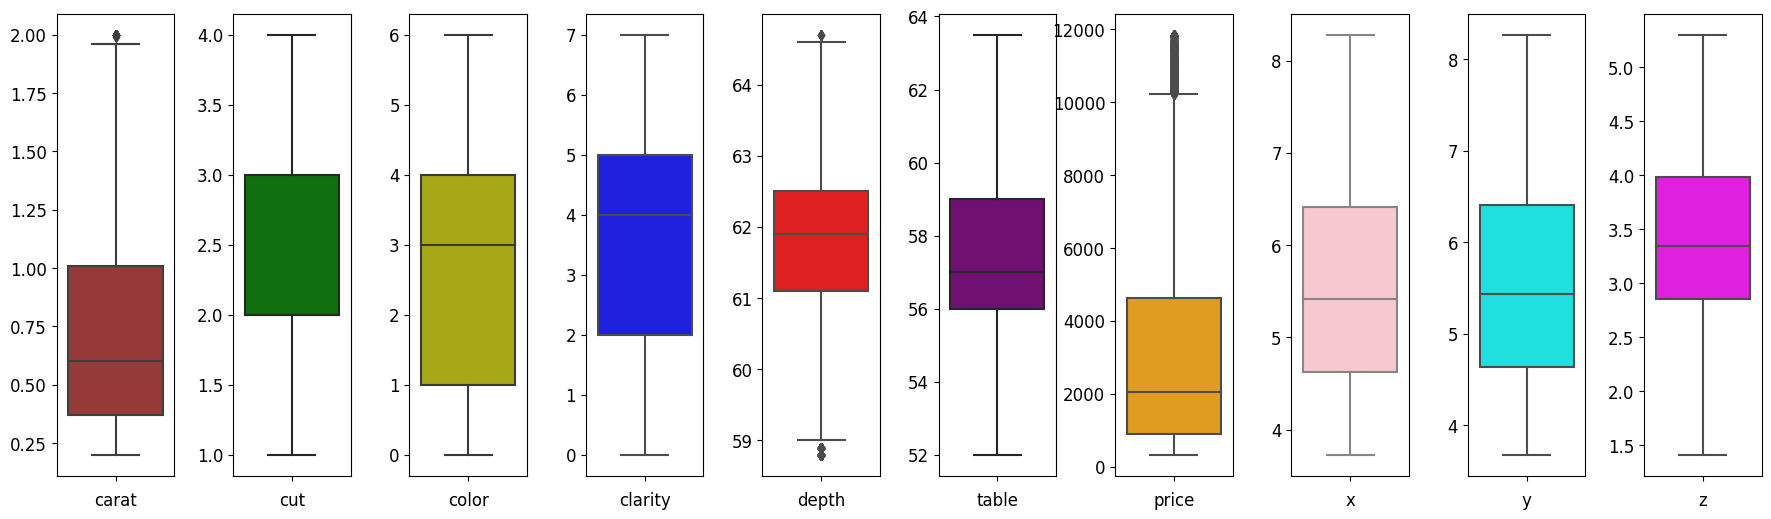

In [31]:
# Initialize figure with 10 subplots in a row
fig, ax = plt.subplots(1, 10, figsize=(22, 6))

# Add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# Define the variables for each subplot
variables = df_no_outliers.columns  # Assuming categorical_col contains the names of your categorical columns
colors = ['brown', 'g', 'y', 'b', 'r', 'purple', 'orange', 'pink', 'cyan', 'magenta']
x_labels = df_no_outliers.columns

# Draw boxplots for each variable in its corresponding subplot
for i, variable in enumerate(variables):
    sns.boxplot(data=df_no_outliers[variable], ax=ax[i], color=colors[i])
    ax[i].set_xlabel(x_labels[i])

    # Remove x-tick labels
    ax[i].set_xticklabels([])

plt.show()


In [32]:
final_df=df_no_outliers

<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:150%; text-align:center; padding: 10px; border-radius:10px;">Prepare Data for Modeling</p>


In [33]:
# Save the cleaned data to a new CSV file
final_df.to_csv('cleaned_data.csv', index=False)

In [34]:
# Split the data into features and target
X = final_df.drop('price', axis=1)
y = final_df['price']


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:

space = {
    'max_depth': scope.int(hp.quniform("max_depth", 1, 5, 1)),
    'gamma': hp.uniform('gamma', 0, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 50),
    'reg_lambda': hp.uniform('reg_lambda', 10, 100),
    'colsample_bytree': hp.uniform('colsample_bytree', 0, 1),
    'min_child_weight': hp.uniform('min_child_weight', 0, 5),
    'n_estimators': 10000,
    'learning_rate': hp.uniform('learning_rate', 0, .15),
    'max_bin': scope.int(hp.quniform('max_bin', 200, 550, 1))
}


In [38]:
#Define the hyperopt objective.
def hyperparameter_tuning(space):
    model = xgb.XGBRegressor(**space)
    
    #Define evaluation datasets.
    evaluation = [(x_train, y_train), (x_test, y_test)]
    
    #Fit the model. Define evaluation sets, early_stopping_rounds, and eval_metric.
    model.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=100,verbose=False)

    #Obtain prediction and rmse score.
    pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, pred)
    rmse = math.sqrt(rmse) 
    print ("SCORE:", rmse)
    
    #Specify what the loss is for each model.
    return {'loss':rmse, 'status': STATUS_OK, 'model': model}

In [39]:
#Run 20 trials.
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print(best)

SCORE:
368.478760080211
SCORE:
690.2922586277323
SCORE:
698.8267864000289
SCORE:
371.83476274991597
SCORE:
691.7846113838397
SCORE:
360.53011206636495
SCORE:
398.3242989925772
SCORE:
695.7171679639531
SCORE:
365.30053850076814
SCORE:
367.1661126622438
SCORE:
415.098250685092
SCORE:
350.9996462223377
SCORE:
692.7526661397028
SCORE:
699.2697170146705
SCORE:
771.3465710251281
SCORE:
381.26224506665943
SCORE:
351.9893664463889
SCORE:
347.44554817656433
SCORE:
353.6148901774426
SCORE:
419.2790478062868
SCORE:
351.1214384989613
SCORE:
353.3561920056477
SCORE:
399.2881079241662
SCORE:
347.40593039968473
SCORE:
352.5580784923624
SCORE:
347.1023339384324
SCORE:
354.0439498719159
SCORE:
352.1939607538094
SCORE:
349.89737462977376
SCORE:
352.26348388693805
SCORE:
355.483677033985
SCORE:
350.1295443240594
SCORE:
359.39541546072627
SCORE:
347.9234520129928
SCORE:
365.44101159086165
SCORE:
353.32991817666186
SCORE:
418.46590182468833
SCORE:
348.848531451891
SCORE:
361.94722411250655
SCORE:
351.64878

In [40]:
#Define the hyperopt objective.
def hyperparameter_tuning(space):
    model = xgb.XGBRegressor(**space)
    
    #Define evaluation datasets.
    evaluation = [(x_train, y_train), (x_test, y_test)]
    
    #Fit the model. Define evaluation sets, early_stopping_rounds, and eval_metric.
    model.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=100,verbose=False)

    #Obtain prediction and rmse score.
    pred = model.predict(x_test)
    rmse = mean_absolute_error(y_test, pred)
    print ("SCORE:", rmse)
    
    #Specify what the loss is for each model.
    return {'loss':rmse, 'status': STATUS_OK, 'model': model}

In [41]:
#Run 20 trials.
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=trials)

print(best)

SCORE:
472.8159429753234
SCORE:
249.27464116539085
SCORE:
195.7899341012008
SCORE:
248.4030003374526
SCORE:
195.1823595351829
SCORE:
196.33331598908208
SCORE:
201.91027608993292
SCORE:
245.1404414782308
SCORE:
197.17902678796287
SCORE:
478.1115235833221
SCORE:
206.10707634815384
SCORE:
470.6165377423266
SCORE:
202.42408702697674
SCORE:
204.36790842015327
SCORE:
206.79312983375627
SCORE:
469.42366928424764
SCORE:
199.39033803123397
SCORE:
240.9890879950282
SCORE:
476.8369354331111
SCORE:
205.0673124888137
SCORE:
200.4468571642429
SCORE:
200.60201637921205
SCORE:
240.61882407476313
SCORE:
194.02132524762834
SCORE:
196.88089820342137
SCORE:
198.0554980417793
SCORE:
194.56381557817457
SCORE:
240.42140700575086
SCORE:
218.647821581588
SCORE:
195.99703707721548
100%|██████████| 30/30 [06:56<00:00, 13.87s/trial, best loss: 194.02132524762834]
{'colsample_bytree': 0.9967588883712276, 'gamma': 0.5580596732942776, 'learning_rate': 0.13708601596515552, 'max_bin': 459.0, 'max_depth': 5.0, 'min_chi